## 第5回課題: ドップラー法（視線速度法）による系外惑星の検出

In [1]:
# 必要なパッケージのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

これまでと同様に、pandas を使って51 Peg（最初に系外惑星が見つかった太陽に似た恒星）の視線速度データ 51Peg_rv.txt を読み込んでみよう（RVは視線速度Radial Velocityの略）。

In [2]:
data = pd.read_csv("51Peg_rv.txt", comment="#")

In [3]:
data

,BJD,RV,e_RV,Set
0,2.449611e+06,-33258.0,9.0,ELODIE
1,2.449612e+06,-33225.0,9.0,ELODIE
2,2.449655e+06,-33272.0,7.0,ELODIE
3,2.449728e+06,-33310.0,7.0,ELODIE
4,2.449729e+06,-33248.0,7.0,ELODIE
...,...,...,...,...
148,2.452612e+06,-33266.0,8.0,ELODIE
149,2.452834e+06,-33315.0,7.0,ELODIE
150,2.452853e+06,-33196.0,7.0,ELODIE
151,2.452859e+06,-33300.0,8.0,ELODIE


1列目のBJDは重心ユリウス日と呼ばれる量で、要するに時間をある時刻から日（day）の単位で示したものである。2列目のRV (radial velocity)は視線速度である。単位はm/s。

ここでは視線速度と時間の関係を知りたいので、BJDとRVを配列として取り出しておく。

In [4]:
x = np.array(data["BJD"])
y = np.array(data["RV"])

これまでのようにプロットしてみよう。

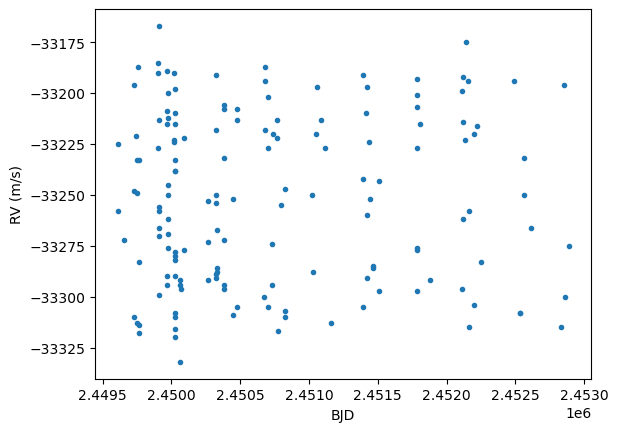

In [5]:
plt.xlabel("BJD")
plt.ylabel("RV (m/s)")
plt.plot(x, y, ".");

デフォルトだとラベルとかに日本語が使えないが、japanize_matplotlib というパッケージをインポートすると使えるようになる。japanize_matplotlib はデフォルトではColabにインストールされていないようなので、!pip install japanize_matplotlib でまずインストールする。他のパッケージも同様にインストールできるので、colab に入っていないものが必要な時はそうする。

In [6]:
!pip install japanize_matplotlib
import japanize_matplotlib

これで日本語が使えるようになった。ついでにBJDの値が大きすぎて見づらいので、最初の時刻からの差として定義しなおそう。つまり

In [7]:
t = x - x[0] # xの全要素から0番目x[0]を引いたもの

をxの代わりに用いる。

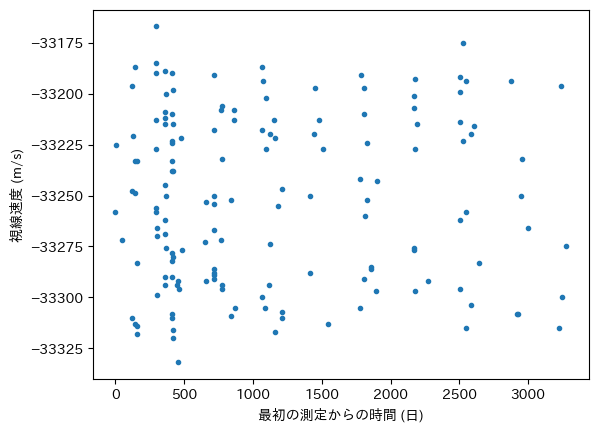

In [8]:
plt.xlabel("最初の測定からの時間 (日)")
plt.ylabel("視線速度 (m/s)")
plt.plot(t, y, ".");

### 課題1: 周期的な変動の確認

上のプロットだけ見ていても何かばらついていることしかわからない。[Birkby et al. (2017)](https://iopscience.iop.org/article/10.3847/1538-3881/aa5c87) という論文によると、51 Pegを公転する惑星の公転周期は 4.230787日である。

ここではこの周期を既知とし、上の視線速度データがこの周期で変動していることを確かめてみよう。

In [9]:
period = 4.230787 # 公転周期（日）

もし視線速度（ここでは配列$y$）が上の period で周期的に変化していれば、ある時刻$t=t_0$における$y$の値と、時刻$t=t_0+P, t_0+2P, t_0+3P, \dots$における$y$の値は全て同じはずである（第5回講義スライド参照）。すなわち、$y$は$t$を$P$で割った**余り**のみに依存するはずである。

これを視覚的に確かめるため、$t$を$P$で割った余りを横軸、$y$を縦軸としてデータをプロットしてみよう。軸のラベルも適切に記入すること。余りの計算は、演算子 % を用いて

In [10]:
5 % 2 # 5を2で割った余り

1

とできる。整数以外の数での"割り算"もできてここではそれを用いる。

In [11]:
5 % 2.5 # 5 = 2.5 x 2 + 0

0.0

In [12]:
# t を periodで割った余りを計算し、新たに t_amari として定義
t_amari = t % period

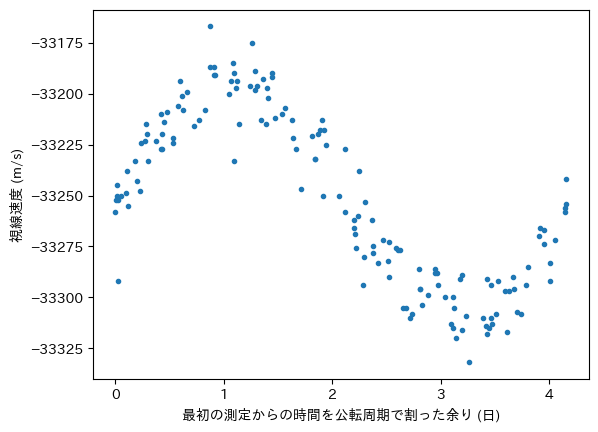

In [13]:
plt.xlabel("最初の測定からの時間を公転周期で割った余り (日)")
plt.ylabel("視線速度 (m/s)")
plt.plot(t_amari, y, ".");

### 課題2
1. 「$t$を$P$で割った余り」をさらに$P$で割ったものを軌道の位相（phase）という。定義から位相は0から1の実数である。位相$\phi$（文字はphiとするとよい）を計算し、$y$を縦軸、$\phi$を横軸としてデータを再度プロットしてみよう。x軸の範囲は、pyplot.xlim 関数を用いて0から1に指定してみよう。
2.  周期が1のサイン関数（を定数倍し、さらに定数を加えたもの）をデータ上に線でプロットし、振幅や定数を調整してデータと近くなる値を探してみよう。プロットの仕方については[lecture2-2_plot.ipynb](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture2_tutorial/lecture2-2_plot.ipynb)も参照。np.linspace()でx方向の配列を作成する。

In [14]:
# さっきの t_amari を使って位相 phi を新たに定義
phi = t_amari / period

サイン関数のプロット用に配列を定義; [lecture2-2](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture2_tutorial/lecture2-2_plot.ipynb)参照。

In [15]:
x = np.linspace(0, 1, 1000)

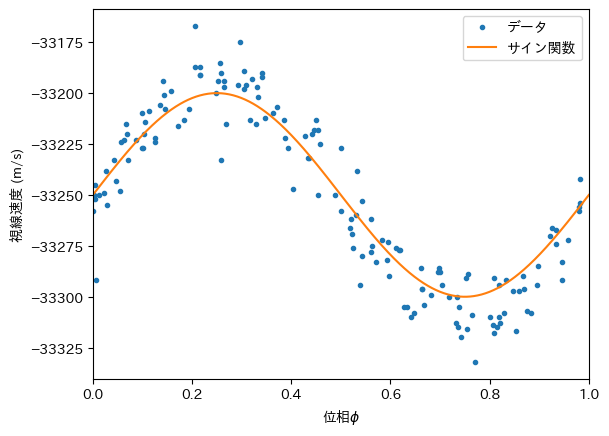

In [16]:
plt.xlabel("位相$\phi$")
plt.ylabel("視線速度 (m/s)")
plt.xlim(0, 1) # x軸の範囲を指定
plt.plot(phi, y, ".", label="データ")
plt.plot(x, 50 * np.sin(2*np.pi*x) - 33250, label="サイン関数")
plt.legend(loc="best"); #　凡例を表示

周期$P$の$\sin$関数は
$$
y = \sin\left(2\pi x \over P\right)
$$
と表されることに注意する。今は横軸を位相にとっているので周期$P$は1である。

また視線速度の平均の値が-33250くらいになっているので、定数を足した。この値は、恒星と惑星からなる系の質量中心が観測者に対して運動していることに対応する。

### 課題3（以降は余裕があれば; 4を先にやってもよい）

サイン関数の振幅$K$を引数とし、データとの差の二乗和
$$
    L = \sum_{i=1}^N \left\{y_i - \left[K\sin(2\pi \phi_i) + g\right]\right\}^2
$$
を返す関数 objective を作成しよう。ここで、$g$はデータの平均値として関数の中で計算すること。これがデータとの一致度のひとつの指標となる。

objectiveは以下のように作成できる。

In [17]:
def objective(K):
    g = np.mean(y) # 平均をとる
    y_model = K * np.sin(2*np.pi*phi) + g # データのphaseでのyの値
    L = np.sum((y - y_model)**2)
    return L

課題2で大体求めた$K$の周辺で、[lecture4-2](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture4_spectrum/lecture4-2_for-loop.ipynb)で扱ったfor文を用いて objective の値を計算し、$L$が最小になる$K$を探してみよう。

まず$K$の配列を用意し、それに対してfor文を用いて$L$の値の配列を作って、$K$に対して$L$をプロットしてみるとよい。例えば、a=np.array([0,1,2,3,4,5]) という配列に対して、各要素を2倍した新たな配列 b は以下のように作れる。

In [18]:
a = np.array([0, 1, 2, 3, 4, 5])

In [19]:
b = [] # 空のリストを用意 
for i in range(len(a)): 
    b.append(a[i] * 2) # bに値を追加
b = np.array(b) # numpy arrayに変換した

In [20]:
b

array([ 0,  2,  4,  6,  8, 10])

この例に関しては、 2 * a で同じものが作れるのでわざわざこういうことをする必要はない。

同じようにやってみよう。ここでは上で$K=50\,\mathrm{m/s}$としたので、30から80の範囲を調べてみる。

そのためにこの範囲を等間隔で200に分けた配列をまず用意する。

In [21]:
K_values = np.linspace(30, 80, 200)

この配列に含まれる各々の$K$の値について、関数objectiveを用いて値を計算し、上の例と同様に配列L_valuesとして保存する。

In [22]:
L_values = []
for i in range(len(K_values)):
    L_values.append(objective(K_values[i]))
L_values = np.array(L_values)

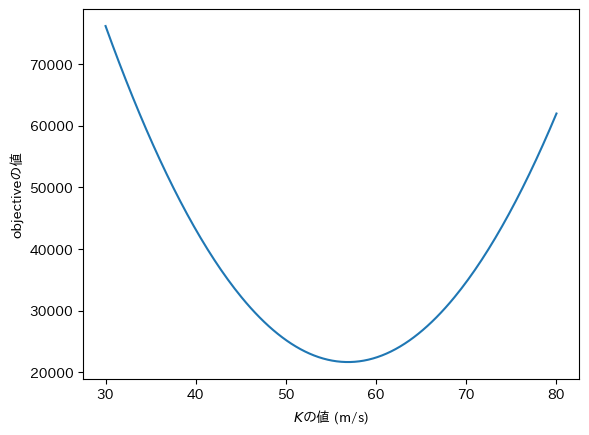

In [29]:
plt.xlabel("$K$の値 (m/s)")
plt.ylabel("objectiveの値")
plt.plot(K_values, L_values);

大体$K=50$から$60$の間にobjectiveが最小になるところがある。定量的には

In [24]:
np.argmin(L_values)

107

という関数を使うと、107番目の要素でL_valuesが最小値をとることがわかる。argminは最小値（minimum）を与える要素の引数（argument）を返す関数になっている。

このときの$K$は

In [25]:
K_values[107]

56.88442211055276

である。

### 課題4

課題2や3で推定した$K$の値から、惑星の質量についてどのような情報が得られるか考察してみよう。恒星51Pegの質量は太陽の約1.1倍である。

太陽質量は有効数字3桁で$1.99\times 10^{30}\,\mathrm{kg}$, 木星の質量は$1.90\times10^{27}\,\mathrm{kg}$, 万有引力定数は$G=6.67\times10^{-11}\,\mathrm{m^3/kg/s^2}$である。

ここでは$K$の値として上で求めた

In [26]:
K_best = 56.9

を使おう。惑星や恒星の質量、公転周期との関係は、補足資料PDFの式67
$$
K \approx 200\,\mathrm{m/s}\,\left(m \over M_{\rm Jup}\right)\,\left(M \over M_\odot\right)^{-2/3}\,\left(P \over \mathrm{1\,day}\right)^{-1/3}
$$
で与えられる。これに$K=K_\mathrm{best}$, $M=1.1\,M_\odot$, $P=4.230787\,\mathrm{days}$を代入すると、木星質量の単位で求めた$m$は

In [27]:
m = (K_best / 200) * 1.1**(2./3.) * period**(1./3.) # 実際は上の式の m / MJup

In [28]:
print(m)

0.4903254639174911


となる。軌道面が視線方向に対して傾いている場合は実際の質量はこれより大きくなる。

### 補足

ちなみにここでは位相phiやt_amariを計算する際、単に時間を$P$で割った。その結果、位相0はほぼ"正しい"位置（視線速度の時間変化が正で最大の位置）に来たが、これは実はたまたまである。一般には、位相0（以外の値でもよい）に対応する時刻も最適化する必要がある。